# Homework 4: Linear Binary Classification Methods

**Due date**: October 12, Wednesday by 11:59pm



**Important:** unless otherwise specified, you should **NOT** use loops. This is not to say loops are always bad, but avoiding them should help you:
1.   get more familiar with common language features and libraries
2.   write more efficient code
3.   "think in higher dimensions" (get more comfortable with vectors, matrices, etc.)

## **Question 1:** Linear Discriminant Analysis by Hand (20 points)


Suppose we have 4 training points, each in 2-dimensions: two points in class 1 at $\boldsymbol{x}_1 = \left[
\begin{array}{c}
1 \\
1
\end{array} \right]
\mbox{ and }
\boldsymbol{x}_2 = \left[
\begin{array}{c}
2 \\
2
\end{array} \right]$
, and two points in class 2 at
$\boldsymbol{x}_3 = \left[
\begin{array}{c}
-1 \\
2
\end{array} \right]
\mbox{ and }
\boldsymbol{x}_4 = \left[
\begin{array}{c}
-3 \\
6
\end{array} \right]$.
In the following, show all of your work.

### Problem a. (4 points)

Compute the mean vectors $\boldsymbol{\mu}_1$ and $\boldsymbol{\mu}_2$ for the two classes.

### Problem b. (10 points)
Compute the average within-class covariance matrix $\sum_{x}$.

### Problem c. (6 points)

Compute the weight vector $\boldsymbol{w}_{LDA}$ and bias vector $\boldsymbol{c}_{LDA}$ for Linear Discriminant Analysis. Recall that the inverse of a $2 \times 2$ matrix is given by

$\left[
\begin{array}{cc}
a & b\\
c & d
\end{array} \right]^{-1}
= \frac{1}{ad - bc} \left[
\begin{array}{cc}
d & -b\\
-c & a
\end{array} \right]$


Which point is closest to the decision boundary?

**Note:** The distance between a point $(x_0, y_0)$ and a line $ax + by + c = 0$ is equal to $\frac{|ax_0 + by_0 + c|}{\sqrt{a^2 + b^2}}$.

## **Question 2:** Creating a Dataset (10 points)

For this assignment, we will create a simple linearly-separable dataset for binary classification. We have provided you with the code to generate the feature vectors. Notice that one class has significantly more samples than the other.

**Important:** Although this dataset has only 1 feature, **ALL** the code you write in this assignment should be able to run as intended with more features. The only exception is where you are producing plots. Many functions you need to write will be tested for compatibility with more features in question 5.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.random import default_rng

In [2]:
# Do NOT change
rng = default_rng(42)
x1 = rng.normal(-1, 1, 80)
x2 = rng.normal(4, np.sqrt(3), 20)

### Problem a. (4 points)
We need to create appropriate labels for the two classes. x1 is the feature vectors of the negative class and x2 the positive class. Also produce a colored feature-label scatter plot (the negative class should be blue and the positive class should be red).

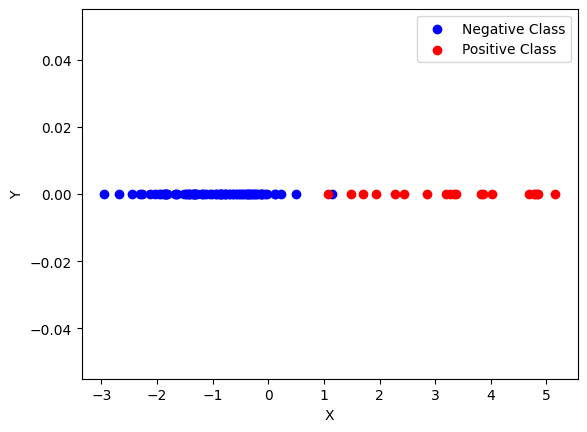

In [3]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
plt.scatter(x1, np.zeros_like(x1), color='blue', label='Negative Class')
plt.scatter(x2, np.zeros_like(x2), color='red', label='Positive Class')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Problem b. (3 points)
Combine the data into X and y, and then perform a 75-25 train-test split. Use 42 as the random_state.

Hint: X has to be a 2D array, so you need to use reshape at some point.

In [4]:
# WRITE CODE HERE:

random_state=42
test_size=0.25

X = np.concatenate([x1,x2])
y = np.array([0]*len(x1) + [1]*len(x2))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

### Problem c. (3 points)
To conveniently account for the bias term in later parts, we will also extend all feature vectors by appending a 1. Apply this to both X_train and X_test.

In [5]:
#WRITE CODE HERE:

# Create a column of 1's
train_one = np.ones((X_train.shape[0], 1))
test_one = np.ones((X_test.shape[0], 1))

Xtr_ext = np.column_stack((X_train, train_one))
Xte_ext = np.column_stack((X_test, test_one))

## **Question 3:** Fisher's Linear Discriminant (22 points)
Fisher's Linear Discriminant is a method that takes d dimensional feature vectors and projects them into 1 dimension, and it tries to do so in a fashion where the resulting 1D values are well-separated by class. Here our d happens to be 1, but as mentioned above, the code you write needs to be able to accomodate higher dimensions for full credit.

### a. Separate the training set by class (4 points)

Write a function seperate that takes the inputs X, y and separates X based on y.

For full credit, create a vectorized implementation (no for loops).

In [6]:
def seperate(X, y):
    # WRITE CODE HERE:

     # Get unique labels in y
    unique_labels = np.unique(y)

    # Create an empty dictionary to store separated data
    separated_data = {label: X[y == label] for label in unique_labels}
    
    X1 = separated_data[unique_labels[0]]
    X2 = separated_data[unique_labels[1]]
    return X1,X2

X1,X2 = seperate(X_train, y_train)

### b. Calculate mean vectors (4 points)
Write a function get_means that takes the inputs X1, X2 and calculates the mean vectors of the two classes.

For full credit, create a vectorized implementation (no for loops).

In [7]:
def get_means(X1, X2):
    # WRITE CODE HERE:
    m1 = np.mean(X1, axis=0)
    m2 = np.mean(X2, axis=0)
    return m1, m2

m1, m2 = get_means(X1, X2)
print('m1, m2:', m1, m2)

m1, m2: -0.9816871675794315 3.1008681575601402


### c. Calculate within-class covariance (4 points)
$S_w$, the total within-class covariance matrix, is a d by d matrix given by $S_1 + S_2$ where $S_1 = \sum_{x_i \in X_1}(x_i-m_1)^T(x_i-m_1) = (X_1-m_1)^T(X_1-m_1)$.

Write a function get_Sw that takes the inputs X1, X2, m1, m2 and calculates Sw.

For full credit, create a vectorized implementation.

**Note:** depending on the schema of the dataset (row-major vs column-major), the formula to use might differ slightly from those on the lecture slides. We assume row-major (each sample is a row) here, as many public datasets are organized this way.

In [8]:
def get_Sw(X1, X2, m1, m2):
    # Calculate the centered data matrices.
    X1_centered = X1 - m1
    X2_centered = X2 - m2

    # Calculate the within-class scatter matrix.
    Sw = np.dot(X1_centered.T, X1_centered) + np.dot(X2_centered.T, X2_centered)
    return Sw

Sw = get_Sw(X1, X2, m1, m2)
print('Sw:', Sw)

Sw: 52.82609458984267


### d. Calculate $w_{FLD}$ and $b_{FLD}$ (4 points)
Write a function get_wFLD_ext that takes the inputs Sw, m1, m2 and calculates the extended $w_{FLD}$.

Recall that in class we mentioned the average of the averages of the two classes after the linear transformation can serve as the bias term. However, since we want the outputs of $Xw + b$ on the two classes to be roughly separated by 0, we actually want the effect of adding b to be the same as subtracting that average. Thus, use $b = -(m_1w + m_2w)/2$.

For full credit, create a vectorized implementation, and do not use the inverse function.


In [9]:
Sw, m1, m2 = np.array([[Sw]]),np.array([[m1]]),np.array([[m2]])

In [10]:
# def get_wFLD_ext(Sw, m1, m2):

#     # Calculate the pooled scatter matrix.
#     Sw_p = (Sw + Sw.T) / 2
    
#     # Calculate the mean difference vector.
#     m_diff = m1 - m2

#     # Calculate the extended WFLD vector.
#     w_FLD_ext = np.linalg.inv(Sw_p).dot(m_diff)

#     # Normalize the extended WFLD vector.
#     w_FLD_ext /= np.linalg.norm(w_FLD_ext)

#     return w_FLD_ext


def get_wFLD_ext(Sw, m1, m2):
    # Calculate the weights wFLD_ext without using the inverse
    wFLD_ext = np.linalg.lstsq(Sw, (m1 - m2), rcond=None)[0]

    # Calculate the bias term b as per the given formula
    b = -0.5 * np.dot(wFLD_ext, (m1 + m2))

    # Append the bias term to wFLD_ext
    wFLD_ext = np.append(wFLD_ext, b)

    return wFLD_ext

wFLD_ext = get_wFLD_ext(Sw, m1, m2)
print('wFLD_ext:', wFLD_ext)

wFLD_ext: [-0.07728293  0.08188826]


### Problem e. (2 points)

Create a scatter plot of the training data overlayed by the FLD solution.

The test CCR using FLD is [[-0.25803306  0.27340938]
 [ 0.10198806 -0.10806558]
 [ 0.1758717  -0.18635199]
 [ 0.06038203 -0.06398023]
 [ 0.06826511 -0.07233306]
 [ 0.02700321 -0.02861235]
 [-0.01719865  0.01822352]
 [-0.37027472  0.39233957]
 [ 0.00932048 -0.00987589]
 [ 0.0537335  -0.05693551]
 [ 0.00939372 -0.00995349]
 [-0.08822987  0.09348753]
 [ 0.03886089 -0.04117663]
 [ 0.14017367 -0.14852669]
 [-0.39819881  0.42192767]
 [ 0.22806464 -0.24165513]
 [ 0.11030227 -0.11687523]
 [ 0.06503052 -0.06890572]
 [ 0.07217988 -0.07648112]
 [ 0.10869187 -0.11516887]
 [ 0.12665728 -0.13420485]
 [-0.37348348  0.39573955]
 [ 0.03614452 -0.03829839]
 [ 0.12871547 -0.13638569]
 [ 0.09206749 -0.09755383]]


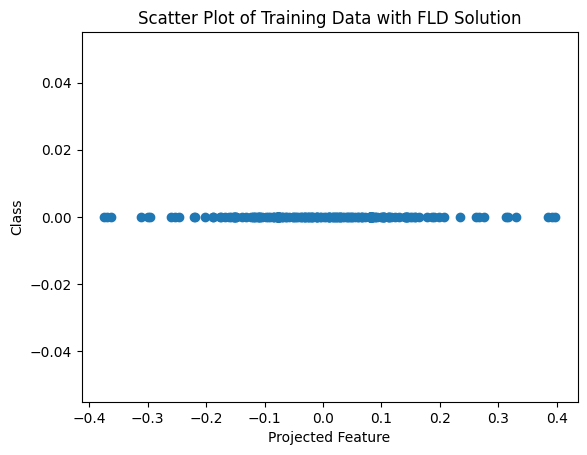

In [11]:
# WRITE CODE HERE:

CCR = np.dot(X_test.reshape(-1,1), wFLD_ext.reshape(1,-1))
print("The test CCR using FLD is", CCR)

# Plot the scatter plot
X_train_projected = np.dot(Xtr_ext.reshape(-1,1), wFLD_ext.reshape(1,-1))
plt.scatter(X_train_projected, np.zeros_like(X_train_projected), marker="o")

# Set the title and labels
plt.title("Scatter Plot of Training Data with FLD Solution")
plt.xlabel("Projected Feature")
plt.ylabel("Class")

# Show the plot
plt.show()

### f. Evaluation (4 points)

Complete the linear_binary_predict function to predict the labels of the test set. Also complete compute_CCR and report the correct classification rate (CCR).

linear_binary_predict takes Xext, a matrix of extended feature vectors, and wext, an extended weight vector; it performs linear binary classification and returns a vector of predicted binary labels.

compute_CCR takes Xext, wext, along with y, the expected binary labels to compute CCR. It should make use of linear_binary_predict.

Note:
*   We assume Xext to be row-major, meaning each row is a sample.
*   Do not change the function prototype of linear_binary_predict. This also applies to all other functions we ask you to complete


In [12]:
def linear_binary_predict(Xext, wext):
    # WRITE CODE HERE:
    predictions = np.dot(Xext, wext) > 0
    return predictions.astype(int)  # Convert True/False to 1/0

def compute_CCR(Xext, wext, y):
    # WRITE CODE HERE:
    
    # Predict labels using linear_binary_predict
    predictions = linear_binary_predict(Xext, wext)

    # Compute the Correct Classification Rate (CCR)
    correct_classifications = (predictions == y).sum()
    CCR = correct_classifications / len(y)
    return CCR

CCR = compute_CCR(Xte_ext, wFLD_ext, y_test)
print("The test CCR using FLD is", CCR)

The test CCR using FLD is 0.04


## **Question 4:** An algorithm using SGD (33 points)
Let us consider a different linear classifier in this problem, one based on the idea of an $\textit{error}$ function minimization problem, similar to what we studied with linear regression, but whose error function is more tailored to the classification problem.

The form of our linear classifier is $h_{\bf{w}}(\bf{x}) = \mbox{sgn}(\bf{w}^T \bf{x})$, where $sgn$ is the sign function (so $1$ if $\bf{w}^T \bf{x} \geq 0$ and $-1$ otherwise).  We are assuming here that we have padded the inputs with an extra dimension of $1$ to account for the bias term in the linear function, as we did with linear regression.

In the binary classification case, each target class $y_i$ is either $1$ or $-1$.  One possible error function to use would say that the error is 0 if our linear classifier agrees with the target label (i.e. $y_i = \mbox{sgn}(\bf{w}^T \bf{x}_i$)), and if our linear classifier predicts the incorrect class ($y_i \neq \mbox{sgn}(\bf{w}^T \bf{x}_i$)), then the error will be given by $|\bf{w}^T \bf{x}_i|$---intuitively, we penalize more for predictions that are farther from being predicted correctly.

**Note:** the analytical parts of this question assume column feature vectors. However, you should still assume row feature vectors in the coding parts for consistency with our datasets.

### Problem a. (5 points)
Show that, for each training point, this error function may be concisely written as

$L_i(\bf{w}) = \max(0, -y_i \bf{w}^T \bf{x}_i)^2$.

### Problem b. (5 points)
We will compute the total loss over the training data as the sum of the $L_i$ losses, namely

$L(\bf{w}) = \sum_{i=1}^n \max(0, -y_i \bf{w}^T \bf{x}_i)^2$.

Note that one reason we chose this particular loss function is that it is continuous (unlike the 0-1 loss).  Furthermore, it has a simple sub-gradient.  The sub-gradient of the loss at 0 is 0, and everywhere else it is equal to the gradient.  Show that the sub-gradient is equal to
$\nabla_{\bf{w}} L_i =
\begin{cases}
0 & h_{\bf{w}} \mbox{ classifies $\bf{x}_i$ correctly}\\
-2y_i \bf{x}_i & h_{\bf{w}} \mbox{ classifies $\bf{x}_i$ incorrectly.}
\end{cases}$

### Problem c. (5 points)
Using a batch size of 1 and a step size of 1, write down the update rule for stochastic (sub)-gradient descent to minimize $L(\boldsymbol{w})$.

### Problem d. (10 points)
Now it's time to implement the actual algorithm using the update rule we derived from part c.

1.   Complete the one_pass function, which iterates over the entire Xext and y once, updating w in the process. (6 points)
2.   Go over the training set twice (2 epochs) to get your final w, which you can do by calling one_pass twice in the get_wSGD function. Then report the CCR on the test set. (6 points)

Note:
* You should always shuffle the training set before each pass
* The first shuffle has already been performed by train_test_split, so a shuffle before the first pass is not required here.
* If you run just this cell multiple times, you will likely get different CCRs because of shuflling. You should do a "Run all" before submitting.

In [13]:
from sklearn.utils import shuffle

def one_pass(Xext, y, w):
    n = Xext.shape[0]
    for i in range(n):
        xi = Xext[i]
        yi = y[i]
        gradient = 0  # Initialize the gradient
        if -yi * np.dot(w, xi) < 0:  # Check if this is a misclassified point
            gradient = -2 * yi * xi
        w = w - gradient  # Update w
    return w

def get_wSGD(Xext, y):
    # use 42 as the random state for shuffling
    random_state=42
    w = np.zeros(Xext.shape[1])  # Initialize w with zeros
    for epoch in range(2):  # Two passes (epochs) over the dataset
        Xext, y = shuffle(Xext, y, random_state=random_state)  # Shuffle the data
        w = one_pass(Xext, y, w)  # Perform one pass and update w
    return w

wSGD = get_wSGD(Xtr_ext, y_train)

# Calculate the Correct Classification Rate (CCR)
CCR = compute_CCR(Xte_ext, wSGD, y_test)
print("The test CCR using SGD is", CCR)
print('wSGD:', wSGD)

The test CCR using SGD is 0.84
wSGD: [0. 0.]


### Problem e. (10 points)

In previus parts we are using a fixed step size of 1, which can be too large for SGD to converge to a local minimum consistently.

In practice, a technique called learning rate decay is commonly used with SGD. Essentially, the step size gets smaller after each iteration. This allows you to "learn fast" in the beginning and also be able to converge to a local minimum later when you are close to one.

Another hyperparameter that can be changed is the batch size. Althouh a larger batch size makes each step slower, it allows for more accurate estimates of the gradient at each step.

We will use a batch size of 4, and an initial learning rate (step size) of 1 with the inverse square root decay, which means the step size at iteration $t$ is $\frac1{\sqrt t}$.

Note:
* Average the gradient over the batch. If the last batch of an epoch contains less than 4 data points, simply skip it and proceed to the next epoch.
* $t$ starts at 1, not 0; otherwise, you will get a division by 0
* You can get rid of the one_pass2 function if you think it's better to incorporate it into get_wSGD2.

In [14]:
def one_pass2(Xext, y, w, t, batch_size):
    n = Xext.shape[0]
    for i in range(0, n, batch_size):
        if i + batch_size > n:
            continue  # Skip the last batch if it contains less than 4 data points
        Xi = Xext[i:i + batch_size]
        yi = y[i:i + batch_size]
        gradient = np.zeros(Xext.shape[1])  # Initialize the gradient
        for j in range(batch_size):
            xi = Xi[j]
            yi_j = yi[j]
            if -yi_j * np.dot(w, xi) < 0:  # Check if this is a misclassified point
                gradient += -2 * yi_j * xi
        step_size = 1 / np.sqrt(t)  # Learning rate decay
        w = w - step_size * gradient  # Update w
        t += 1
    return w, t


def get_wSGD2(Xext, y, batch_size=4):
    # use 42 as the random state for shuffling
    random_state=42
    w = np.zeros(Xext.shape[1])  # Initialize w with zeros
    t = 1  # Starting iteration
    for epoch in range(2):  # Two passes (epochs) over the dataset
        Xext, y = shuffle(Xext, y, random_state=random_state)  # Shuffle the data
        w, t = one_pass2(Xext, y, w, t, batch_size)  # Perform one pass with decay and update w
    return w

wSGD2 = get_wSGD2(Xtr_ext, y_train)
CCR = compute_CCR(Xte_ext, wSGD2, y_test)
print("The test CCR using SGD with decay is", CCR)
print('wSGD2:', wSGD2)

The test CCR using SGD with decay is 0.84
wSGD2: [0. 0.]


## **Question 5:** Testing the above methods on a real-world dataset (6 points)
No code is required for this part. Getting part a to run correctly is not required for part b.

The purpose of this question is to compare the three (four if you count SGD with decay as a separate one) methods on a real-world dataset. We will use the famous Iris dataset created by Sir Ronald Fisher (the same Fisher as in Fisher's Linear Discriminant). It contains feature measurements of 150 samples from three *Iris* flower species. We will combine two of the classes into a single negative class and the remaining class is the positive class.

Run the cells below. The code for this part is provided to you, but it requires several earlier functions to be properly implemented to run. They need to be able to handle data with multiple features.

You will be graded on how well the behavior of this part matches our expectation. Do NOT modify the code provided here; if you have issues running it, check the code you wrote in previous parts.

In [15]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize

iris = load_iris()

# Split data into feature vectors and labels
X = iris.data
y = iris.target
# change the label values for binary classification
y[:100] = -1
y[100:] = 1

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, test_size=0.25)
Xtr_ext = np.c_[X_train, np.ones(X_train.shape[0])]
Xte_ext = np.c_[X_test, np.ones(X_test.shape[0])]

In [17]:
import numpy as np

def get_wFLD_ext(Sw, m1, m2):
    # Calculate the weights wFLD_ext without using the inverse
    wFLD_ext = np.linalg.lstsq(Sw, (m1 - m2), rcond=None)[0]

    # Calculate the bias term b as per the given formula
    b = -0.5 * np.dot(wFLD_ext, (m1 + m2))

    # Append the bias term to wFLD_ext
    wFLD_ext = np.append(wFLD_ext, b)

    return wFLD_ext

# Example usage
# Assuming you have already computed Sw, m1, and m2
wFLD_ext = get_wFLD_ext(Sw, m1, m2)
print('wFLD_ext:', wFLD_ext)

wFLD_ext: [-0.07728293  0.08188826]


In [18]:
X1, X2 = seperate(X_train, y_train)
m1, m2 = get_means(X1, X2)
Sw = get_Sw(X1, X2, m1, m2)
wFLD_ext = get_wFLD_ext(Sw, m1, m2)
CCR = compute_CCR(Xte_ext, wFLD_ext, y_test)
print("The test CCR using FLD is", CCR)

wSGD = get_wSGD(Xtr_ext, y_train)
CCR = compute_CCR(Xte_ext, wSGD, y_test)
print("The test CCR using SGD is", CCR)

wSGD2 = get_wSGD2(Xtr_ext, y_train)
CCR = compute_CCR(Xte_ext, wSGD2, y_test)
print("The test CCR using SGD with decay is", CCR)

The test CCR using FLD is 0.02631578947368421
The test CCR using SGD is 0.0
The test CCR using SGD with decay is 0.0
